In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
df.shape

(489, 4)

In [6]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


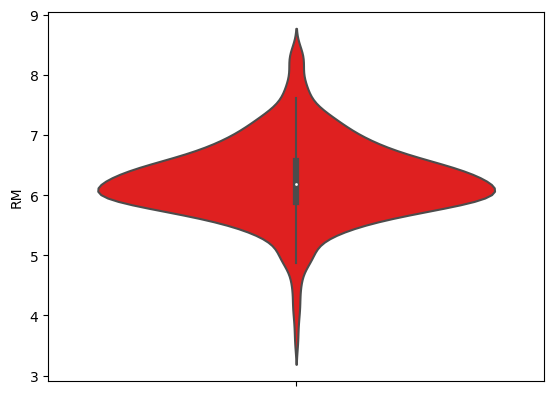

In [8]:
sns.violinplot(y='RM',data=df,color='r')
plt.show()

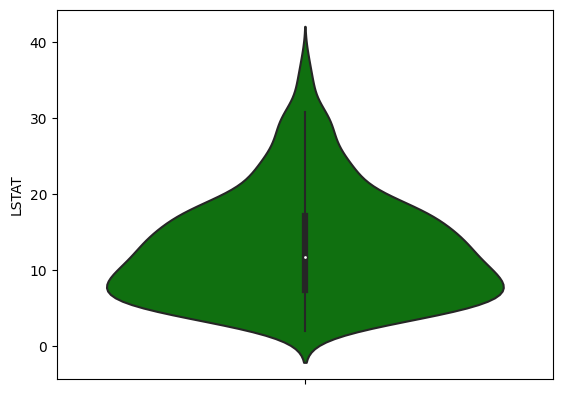

In [9]:
sns.violinplot(y='LSTAT',data=df,color='g')
plt.show()

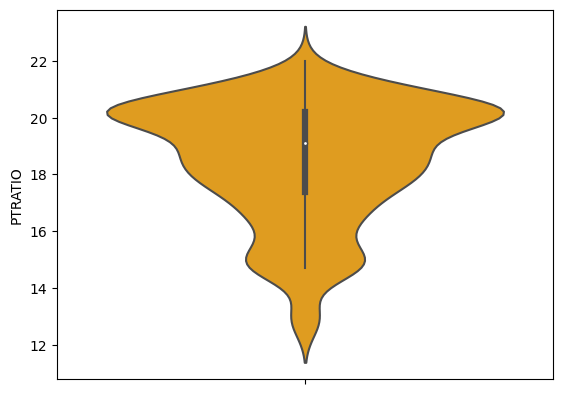

In [10]:
sns.violinplot(y='PTRATIO',data=df,color='orange')
plt.show()

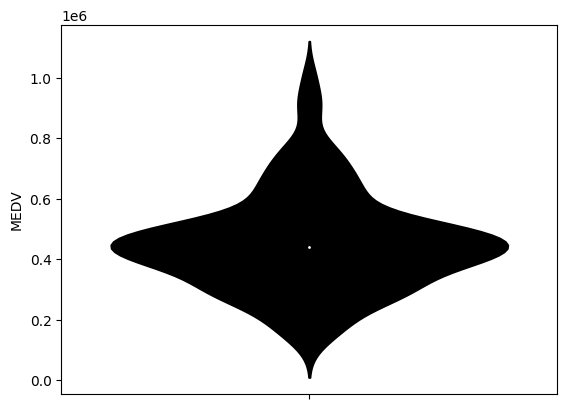

In [11]:
sns.violinplot(y='MEDV',data=df,color='BLACK')
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


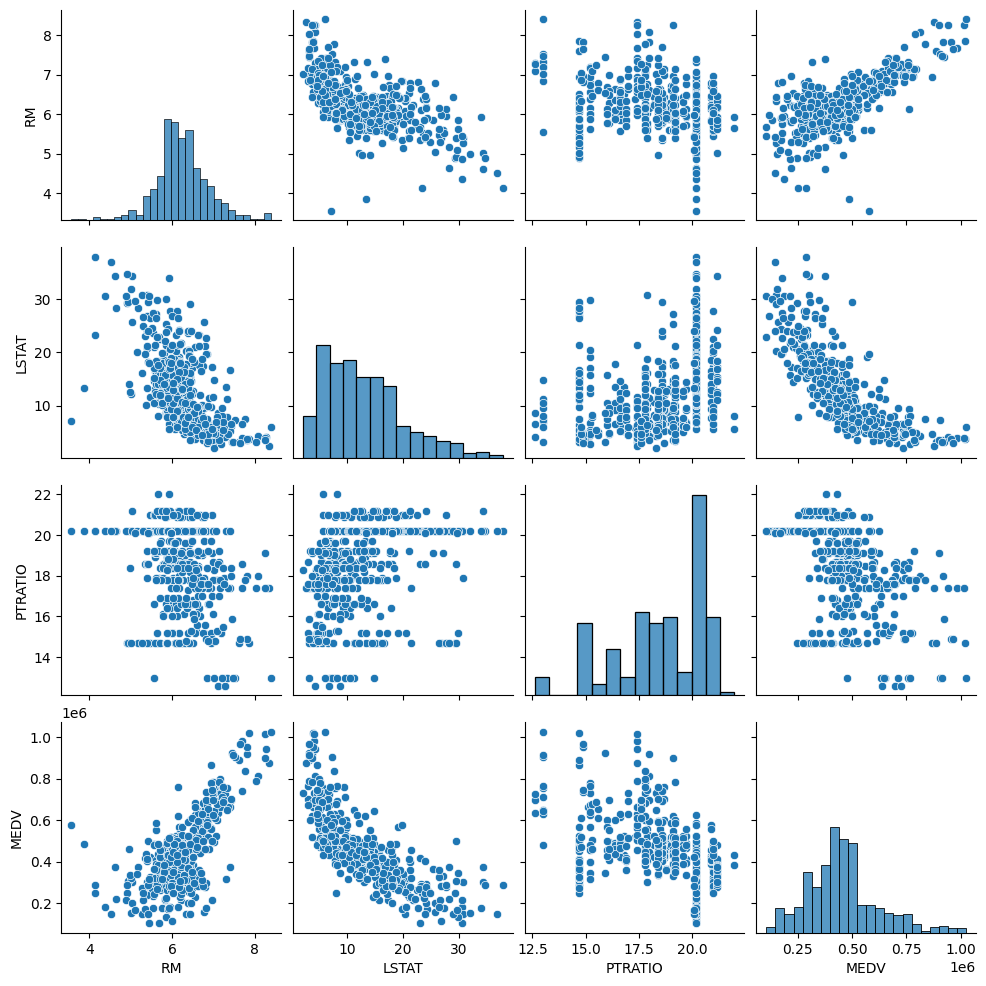

In [12]:
sns.pairplot(df,kind='scatter')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

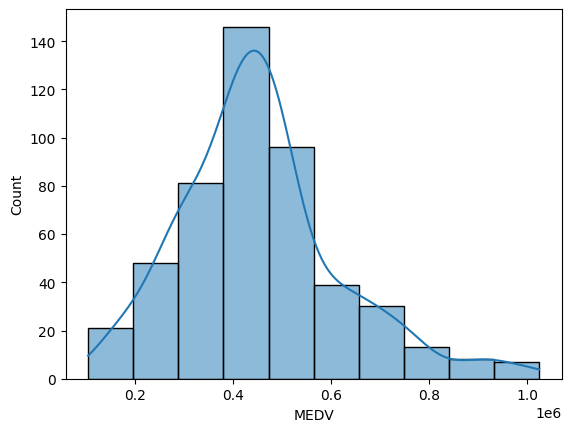

In [13]:
sns.histplot(x='MEDV',data=df,kde=True,bins=10)

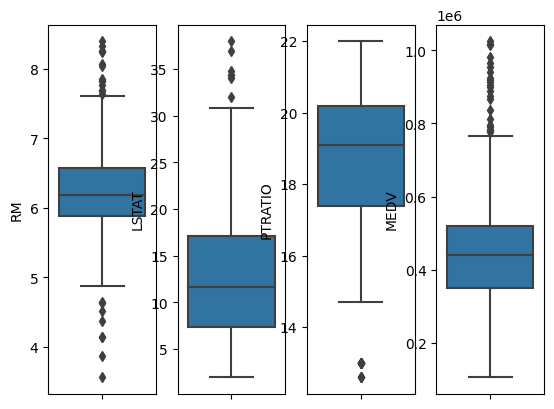

In [14]:
fig,ax=plt.subplots(ncols=4,nrows=1)
index=0
ax=ax.flatten()
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1

In [15]:
#Outliers Check through Box plot

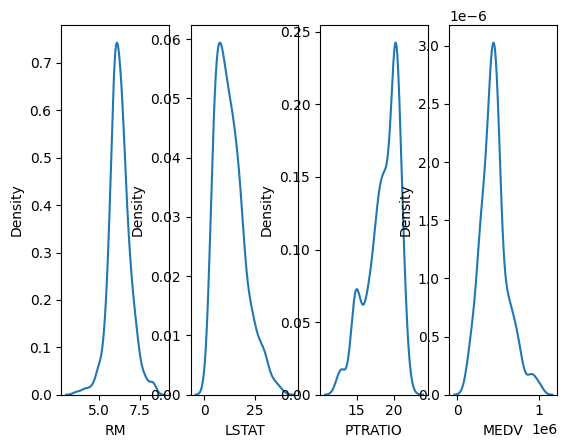

In [16]:
fig,ax=plt.subplots(ncols=4,nrows=1)
ax=ax.flatten()
index=0
for col,value in df.items():
    sns.kdeplot(x=col,data=df,ax=ax[index])
    index+=1

# Model Predictions

In [17]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [19]:
#Scailing MEDV
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
y=sc.fit_transform(y.reshape(-1,1))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=sc.inverse_transform(regressor.predict(x_test))

In [23]:
y_test=sc.inverse_transform(y_test)

In [24]:
y_pred=list(y_pred)

In [25]:
y_test=list(y_test)

In [26]:
fd=pd.DataFrame({'Actual':y_test,'predicted':y_pred})

In [27]:
fd['Actual']=fd['Actual'].apply(lambda x:x[0])

In [28]:
fd['predicted']=fd['predicted'].apply(lambda x:x[0])

In [29]:
fd

,Actual,predicted
0,401100.0,342593.790298
1,501900.0,506257.091630
2,319200.0,410499.931662
3,147000.0,237792.741154
4,247800.0,327005.796532
...,...,...
93,405300.0,487964.056958
94,289800.0,397345.905117
95,518700.0,569811.904427
96,422100.0,463015.874830


In [31]:
List=[i for i in range(0,98)]

In [32]:
len(List)

98

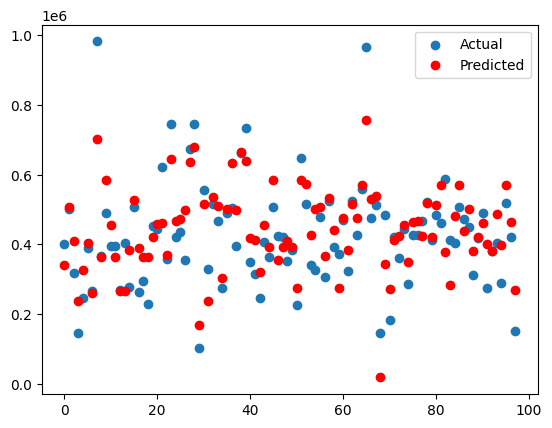

In [33]:
plt.scatter(List,fd['Actual'],label='Actual')
plt.scatter(List,fd['predicted'],color='red',label='Predicted')
plt.legend()
plt.show()

# Classification of house Price

In [37]:
df['MEDV']

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [38]:
def price(x):
    if x<200000 and x>0:
        return 'Low Price'
    elif  x>200000 and x<400000:
        return 'Average Price'
    elif x>400000 and x<800000:
        return 'Above Average Price'
    elif x>800000:
        return 'High Price'
    

In [39]:
df['MEDV']=df['MEDV'].apply(price)

In [43]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['MEDV']=L.fit_transform(df['MEDV'])

In [52]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [56]:
y_pred=classifier.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7653061224489796

In [60]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred=classifier.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7755102040816326

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [64]:
y_pred=classifier.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7244897959183674

In [66]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf' ,random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [67]:
y_pred=classifier.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7653061224489796